# Problema 51
## 51)
Tiremos $N = 10000$ partículas de manera aleatoria dentro de un box 2-D de lado $L=100$, dividido en $100 \times 100$ celdas de lado $\Delta = 1$. Luego, calculemos la distribución de masa discretizada $\rho_{i,j}$ de cada celda, utilizando los métodos **NGP, CIC y TSC**: <br>
Pediremos que $m_i = 1$  $\forall i$.

In [179]:
#Luego, conciendo las posiciones de las partículas, paso el "filtro suavizante" (NGP,CIC o TSC) 
#para cada partícula, aumentando el valor de "rho" en cada celda, para terminar generando el rho_ij final...

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

#Tiremos las partículas:

n = 10000 #Cant de parts
L = 100 #size del box, si dividimos en 100x100, Delta = 1

np.random.seed(0)

#Partículas random en el box 2-D
pos = np.random.uniform(0,L,(n,2))

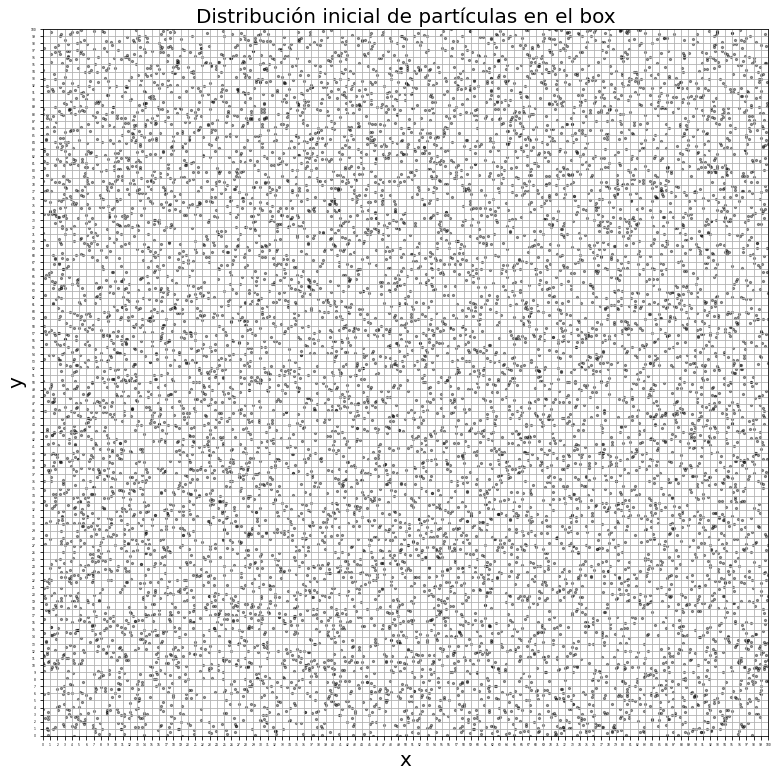

In [182]:
plt.figure(figsize=(13,13))
plt.scatter(pos[:,0],pos[:,1],c='k',alpha=0.4,s=5)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xticks([i for i in range(L+1)],fontsize=3)
plt.yticks([i for i in range(L+1)],fontsize=3)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('Distribución inicial de partículas en el box',fontsize=20)
plt.grid(True)

### NGP:

In [170]:
#Generemos nuestra "rho" discreta para cada celda. Comencemos con el NGP:

#Acomodamos por periodicidad (en este caso, como no estamos integrando, no hace falta)

#if x[l,0] > L or x[l,0] < 0:
#    x[l,0] = x[l,0] % L
#if x[l,1] > L or x[l,1] < 0:
#    x[l,1] = x[l,1] % L

#Contamos cuántas partículas hay en cada celda:

p = np.zeros((L,L)) #Cant de part en cada celda

for k in range(n): #Dada 1 partícula
    for i in range(L): 
        if i <= pos[k,0] < i+1: #En qué columna está (x)
            for j in range(L):
                if j <= pos[k,1] < j+1: #En qué fila está (y)
                    p[j,i] += 1 #Sumo 1 poroto a esa celda
                    
#Algo importante a destacar, es que estamos asignando la posición de la partícula en el borde inferior izquierdo de cada celda (!)

#La densidad discretizada en el grid para el NGP:
#dS = 1*1 = 1 ; m = 1 => rho = cant de partículas que hay en cada celda

rhoNGP = p

In [171]:
x = np.linspace(0,L,100)
y = np.linspace(0,L,100)
X,Y = np.meshgrid(x,y)

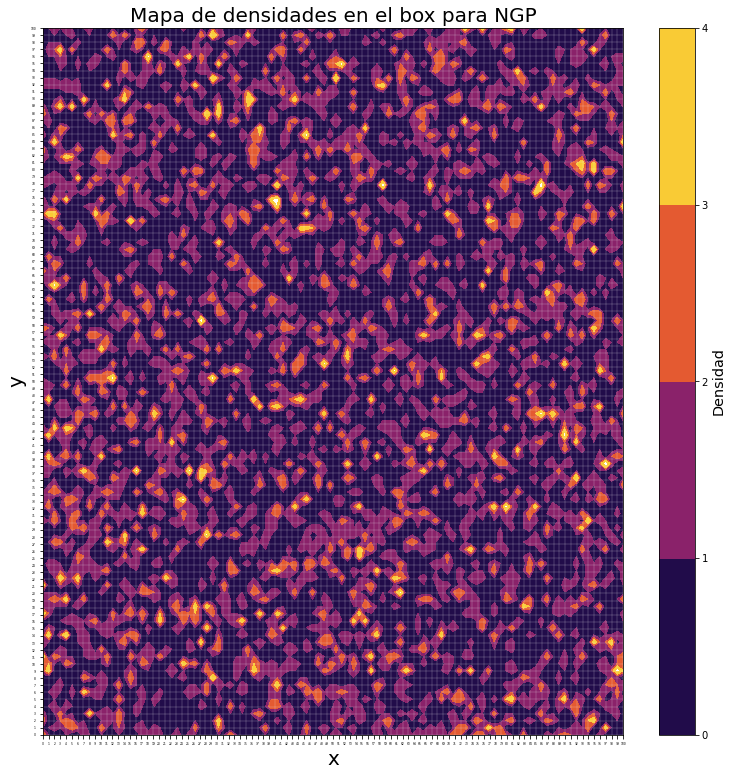

In [194]:
plt.figure(figsize=(13,13))
graf = plt.contourf(X,Y,rhoNGP,np.arange(0,5),antialiased=False)
cb = plt.colorbar(graf)
cb.set_label(label='Densidad', size='x-large')
plt.xticks([i for i in range(L+1)],fontsize=3)
plt.yticks([i for i in range(L+1)],fontsize=3)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('Mapa de densidades en el box para NGP',fontsize=20)
plt.grid(True,c='white',lw=0.2)

*Notamos que para este método, los valores de densidad están discretizados (números enteros, positivos)* <br>
### CIC:

In [173]:
#Ahora, CIC:
#La verdad, en mis apuntes desculé re bien cómo escribir el código. Una maravilla. Implementémoslo:

p = np.zeros((L,L)) #Cant de part en cada celda

for k in range(n): #Dada 1 partícula
    for i in range(L): 
        if i <= pos[k,0] < i+1: #En qué columna está (x)
            for j in range(L):
                if j <= pos[k,1] < j+1: #En qué fila está (y)
                    if i != 99 and j != 99:
                        if pos[k,0] - i > 0.5:
                            p[j,i] += 0.5 + i + 1 - pos[k,0]
                            p[j,i+1] += pos[k,0] + 0.5 - (i+1)
                        else:
                            p[j,i] += 0.5 + pos[k,0] - i
                            p[j,i-1] += i - (pos[k,0] - 0.5)
                        if pos[k,1] - j > 0.5:
                            p[j,i] += 0.5 + j + 1 - pos[k,1]
                            p[j+1,i] += pos[k,1] + 0.5 - (j+1)
                        else:
                            p[j,i] += 0.5 + pos[k,1] - j
                            p[j-1,i] += j - (pos[k,1] - 0.5)
                            
                    elif i == 99 and j != 99:
                        if pos[k,0] - i > 0.5:
                            p[j,i] += 0.5 + i + 1 - pos[k,0]
                            p[j,0] += pos[k,0] + 0.5 - (i+1)
                        else:
                            p[j,i] += 0.5 + pos[k,0] - i
                            p[j,i-1] += i - (pos[k,0] - 0.5)
                        if pos[k,1] - j > 0.5:
                            p[j,i] += 0.5 + j + 1 - pos[k,1]
                            p[j+1,i] += pos[k,1] + 0.5 - (j+1)
                        else:
                            p[j,i] += 0.5 + pos[k,1] - j
                            p[j-1,i] += j - (pos[k,1] - 0.5)
                            
                    elif i != 99 and j == 99:
                        if pos[k,0] - i > 0.5:
                            p[j,i] += 0.5 + i + 1 - pos[k,0]
                            p[j,i+1] += pos[k,0] + 0.5 - (i+1)
                        else:
                            p[j,i] += 0.5 + pos[k,0] - i
                            p[j,i-1] += i - (pos[k,0] - 0.5)
                        if pos[k,1] - j > 0.5:
                            p[j,i] += 0.5 + j + 1 - pos[k,1]
                            p[0,i] += pos[k,1] + 0.5 - (j+1)
                        else:
                            p[j,i] += 0.5 + pos[k,1] - j
                            p[j-1,i] += j - (pos[k,1] - 0.5)
                        
rhoCIC = p/2 #Para que se conserve la masa (sum m_i = M_T => sum rho_i/1 = n = 10000).
             #Fijémosnos en que sumamos 2 veces sobre la misma celda (1 para x y otra para y), puede venir de ahí...

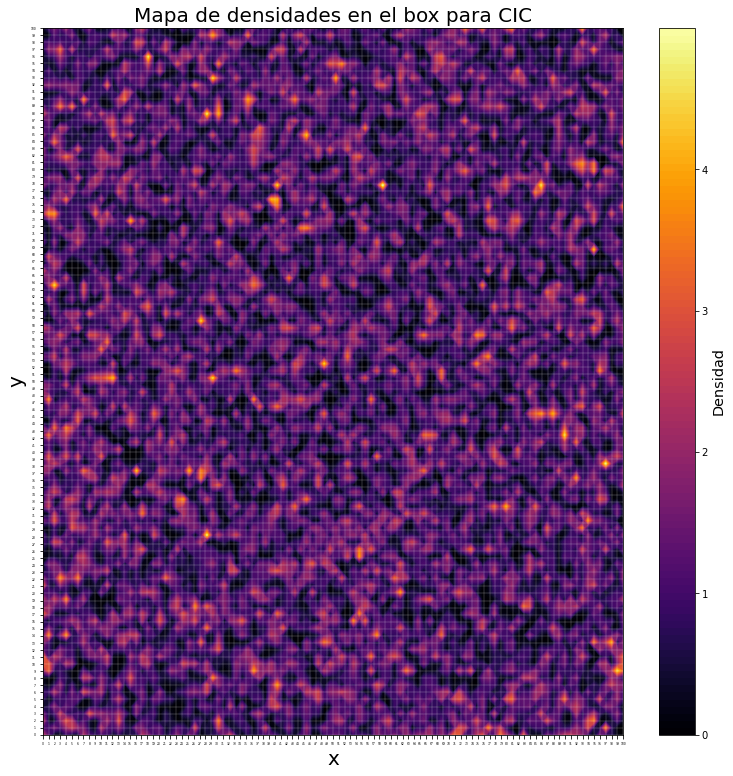

In [192]:
plt.figure(figsize=(13,13))
graf = plt.contourf(X,Y,rhoCIC,np.linspace(0,5,100),antialiased=False)
cb = plt.colorbar(graf,ticks=[np.arange(0,5)])
cb.set_label(label='Densidad', size='x-large')
plt.xticks([i for i in range(L+1)],fontsize=3)
plt.yticks([i for i in range(L+1)],fontsize=3)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('Mapa de densidades en el box para CIC',fontsize=20)
plt.grid(True,c='white',lw=0.2)

### TSC:

In [175]:
#Por último TSC:
#Deducciones en los apuntes*

p = np.zeros((L,L)) #Cant de part en cada celda

for k in range(n): #Dada 1 partícula
    for i in range(L): 
        if i <= pos[k,0] < i+1: #En qué columna está (x)
            for j in range(L):
                if j <= pos[k,1] < j+1: #En qué fila está (y)
                    dx = i - (pos[k,0]-1)
                    dy = j - (pos[k,1]-1)
                    if i != 99 and j != 99:
                        p[j,i-1] += 0.5*dx**2 
                        p[j,i] += 0.5 + dx - dx**2
                        p[j,i+1] += 0.5 - dx + 0.5*dx**2
                        
                        p[j-1,i] += 0.5*dy**2 
                        p[j,i] += 0.5 + dy - dy**2
                        p[j+1,i] += 0.5 - dy + 0.5*dy**2
                        
                    elif i == 99 and j != 99:
                        p[j,i-1] += 0.5*dx**2 
                        p[j,i] += 0.5 + dx - dx**2
                        p[j,0] += 0.5 - dx + 0.5*dx**2
                        
                        p[j-1,i] += 0.5*dy**2 
                        p[j,i] += 0.5 + dy - dy**2
                        p[j+1,i] += 0.5 - dy + 0.5*dy**2 
                        
                    elif i != 99 and j == 99:
                        p[j,i-1] += 0.5*dx**2 
                        p[j,i] += 0.5 + dx - dx**2
                        p[j,i+1] += 0.5 - dx + 0.5*dx**2
                        
                        p[j-1,i] += 0.5*dy**2 
                        p[j,i] += 0.5 + dy - dy**2
                        p[0,i] += 0.5 - dy + 0.5*dy**2 
                        
rhoTSC = p/2 #Por lo mismo de antes

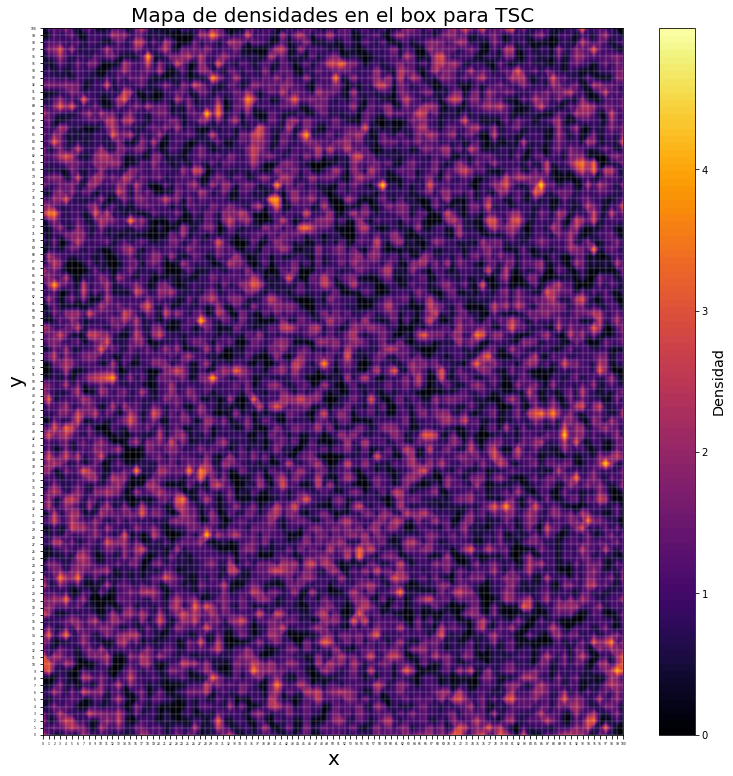

In [193]:
plt.figure(figsize=(13,13))
graf = plt.contourf(X,Y,rhoTSC,np.linspace(0,5,100),antialiased=False)
cb = plt.colorbar(graf,ticks=[np.arange(0,5)])
cb.set_label(label='Densidad', size='x-large')
plt.xticks([i for i in range(L+1)],fontsize=3)
plt.yticks([i for i in range(L+1)],fontsize=3)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('Mapa de densidades en el box para TSC',fontsize=20)
plt.grid(True,c='white',lw=0.2)

Vemos que este último método genera un gradiente de colores mucho más suave que los anteriores ¡Que es lo que buscamos!